# Predictive Maintenance Analysis
#### Predict machine failure based on log data

you can find/Download the dataset from [here](https://www.kaggle.com/c/predictive-maintenance1/overview)

### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#graphs

import warnings
warnings.filterwarnings('ignore')
#avoids warnings

/home/purna/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### file reading

In [5]:
data1 = pd.read_csv("test_label_sample.csv")
data2 = pd.read_csv("train_label.csv")
data3 = pd.read_excel("feature.xlsx")

In [6]:
data1.head()

,date,label
0,25/3/2017,0.130578
1,26/3/2017,0.124545
2,27/3/2017,0.111402
3,28/3/2017,0.115621
4,29/3/2017,0.071451


In [7]:
data2.head()

,date,label
0,3/5/2015,NaN
1,4/5/2015,0.0
2,5/5/2015,0.0
3,6/5/2015,0.0
4,7/5/2015,0.0


In [8]:
data3.head()

,Unnamed: 0,Unnamed: 1,count,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131
0,NaN,date,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,...,1.362250e+08,136675426.0,136675626.0,136676578.0,136676650.0,136676666.0,136676682.0,136676698.0,136676714.0,136676754.0
1,0.0,2015-05-03 00:00:00,0,0,0,0,1,504,0,2,...,9.056261e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2015-05-04 00:00:00,0,0,0,0,0,2250,0,1,...,2.540209e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2015-05-05 00:00:00,0,0,0,0,0,1700,0,2,...,1.360972e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,2015-05-06 00:00:00,0,0,0,0,0,2261,0,10,...,2.612264e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are working on **Data3**.

#### feature engineering

In [9]:
var=['Unnamed: 0']

In [10]:
data3 = data3.drop(var, axis =1)

**changing the column index**

In [11]:
data3
data3.columns = data3.iloc[0]
data3=data3.drop(data3.index[[0]])
data3

,date,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,136222210,...,136225010.0,136675426.0,136675626.0,136676578.0,136676650.0,136676666.0,136676682.0,136676698.0,136676714.0,136676754.0
1,2015-05-03 00:00:00,0,0,0,0,1,504,0,2,8,...,9056.261199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-05-04 00:00:00,0,0,0,0,0,2250,0,1,2,...,25402.087770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-05-05 00:00:00,0,0,0,0,0,1700,0,2,5,...,13609.724304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-06 00:00:00,0,0,0,0,0,2261,0,10,7,...,26122.640408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-05-07 00:00:00,0,0,0,0,0,2950,0,5,8,...,25499.201836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-05-08 00:00:00,0,0,0,0,0,2810,0,7,1,...,17494.625075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-05-09 00:00:00,0,0,0,1,0,2023,0,3,1,...,18652.719992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-05-10 00:00:00,0,0,0,0,0,3226,0,6,5,...,24910.218287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-05-11 00:00:00,0,0,0,0,0,1767,0,4,4,...,26273.122053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2015-05-12 00:00:00,0,0,0,0,0,3062,0,6,11,...,9423.947061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**removing null values/empty values**

In [12]:
data3=data3.iloc[:, :26]

### Some stats

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 1 to 983
Data columns (total 26 columns):
date         983 non-null object
136088194    983 non-null int64
136088202    983 non-null int64
136088394    983 non-null int64
136088802    983 non-null int64
136089546    983 non-null int64
136110468    983 non-null int64
136216674    983 non-null int64
136222202    983 non-null int64
136222210    983 non-null int64
136222234    983 non-null int64
136222250    983 non-null int64
136222882    983 non-null int64
136223186    983 non-null int64
136224578    983 non-null int64
136224586    983 non-null int64
136224978    983 non-null int64
136225010    983 non-null int64
136675426    983 non-null int64
136675626    983 non-null int64
136676578    983 non-null int64
136676650    983 non-null int64
136676666    983 non-null int64
136676682    983 non-null int64
136676698    983 non-null int64
136676714    983 non-null int64
dtypes: int64(25), object(1)
memory usage: 207.4+ KB


In [14]:
data3.describe()

,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,136222210,136222234,...,136224978,136225010,136675426,136675626,136676578,136676650,136676666,136676682,136676698,136676714
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,...,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,1.801628,0.567650,0.033571,0.468973,0.149542,593.253306,0.011190,4.499491,5.158698,0.102747,...,1.236012,98.403866,0.260427,0.006104,0.369278,0.155646,0.662258,0.564598,0.700916,0.964395
std,6.705343,11.679671,0.930307,3.040595,0.582341,3139.150509,0.264838,6.166375,9.725627,0.630700,...,6.568552,483.227372,2.323030,0.119245,0.987164,1.206393,3.651559,2.788478,3.332258,4.498218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,45.500000,0.000000,5.000000,7.000000,0.000000,...,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,364.000000,29.000000,40.000000,6.000000,67425.000000,8.000000,67.000000,190.000000,13.000000,...,182.000000,7801.000000,48.000000,3.000000,17.000000,22.000000,57.000000,36.000000,44.000000,62.000000


There is some variaence or spread in columns such as **136110468** and **136225010**

In [15]:
data3.shape

(983, 26)

**It has 983 rows and 26 columns**.

In [16]:
data3.columns

Index([   'date', 136088194, 136088202, 136088394, 136088802, 136089546,
       136110468, 136216674, 136222202, 136222210, 136222234, 136222250,
       136222882, 136223186, 136224578, 136224586, 136224978, 136225010,
       136675426, 136675626, 136676578, 136676650, 136676666, 136676682,
       136676698, 136676714],
      dtype='object', name=0)

**All the above are 26 columns in our data3 dataset**

### Missing values

In [17]:
data3.isna().sum()

0
date         0
136088194    0
136088202    0
136088394    0
136088802    0
136089546    0
136110468    0
136216674    0
136222202    0
136222210    0
136222234    0
136222250    0
136222882    0
136223186    0
136224578    0
136224586    0
136224978    0
136225010    0
136675426    0
136675626    0
136676578    0
136676650    0
136676666    0
136676682    0
136676698    0
136676714    0
dtype: int64

We had **no** missing values.

### changing object datatype to datetime datatype

In [18]:
data3['date'] = pd.to_datetime(data3['date'])

### Merging files

**to merge both the files we need the column type to be same**

In [19]:
data2['date'] = pd.to_datetime(data2['date'])

In [20]:
data3['date'] = data3['date'].astype(str)
data2['date'] = data2['date'].astype(str)

In [21]:
new=pd.merge(data3, data2, on='date')

In [22]:
new

,date,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,136222210,...,136225010,136675426,136675626,136676578,136676650,136676666,136676682,136676698,136676714,label
0,2015-05-05,0,0,0,0,0,1700,0,2,5,...,2421,0,0,0,0,0,0,0,0,0.0
1,2015-05-06,0,0,0,0,0,2261,0,10,7,...,364,0,0,0,0,0,0,0,0,1.0
2,2015-05-07,0,0,0,0,0,2950,0,5,8,...,461,0,0,0,0,0,0,0,0,0.0
3,2015-05-08,0,0,0,0,0,2810,0,7,1,...,1997,0,0,0,0,0,0,0,0,0.0
4,2015-05-09,0,0,0,1,0,2023,0,3,1,...,7406,0,0,0,0,0,0,0,0,0.0
5,2015-05-10,0,0,0,0,0,3226,0,6,5,...,123,0,0,0,0,0,0,0,0,0.0
6,2015-05-11,0,0,0,0,0,1767,0,4,4,...,135,0,0,0,0,0,0,0,0,0.0
7,2015-05-12,0,0,0,0,0,3062,0,6,11,...,5296,0,0,0,0,0,0,0,0,0.0
8,2015-05-13,0,0,0,0,0,2340,0,8,9,...,98,0,0,0,0,0,0,0,0,0.0
9,2015-05-14,0,0,0,0,0,3130,0,7,8,...,600,0,0,0,0,0,0,0,0,0.0


In [23]:
new.to_csv('atmdata.csv')

Changing **Date** to **ordinal**, so can be used for model building.

In [24]:
import datetime as dt
new['date'] = pd.to_datetime(new['date'])
new['date']=new['date'].map(dt.datetime.toordinal)

new['date'].head()

0    735723
1    735724
2    735725
3    735726
4    735727
Name: date, dtype: int64

In [25]:
new.head()

,date,136088194,136088202,136088394,136088802,136089546,136110468,136216674,136222202,136222210,...,136225010,136675426,136675626,136676578,136676650,136676666,136676682,136676698,136676714,label
0,735723,0,0,0,0,0,1700,0,2,5,...,2421,0,0,0,0,0,0,0,0,0.0
1,735724,0,0,0,0,0,2261,0,10,7,...,364,0,0,0,0,0,0,0,0,1.0
2,735725,0,0,0,0,0,2950,0,5,8,...,461,0,0,0,0,0,0,0,0,0.0
3,735726,0,0,0,0,0,2810,0,7,1,...,1997,0,0,0,0,0,0,0,0,0.0
4,735727,0,0,0,1,0,2023,0,3,1,...,7406,0,0,0,0,0,0,0,0,0.0


### Visualization

#### label column

In [26]:
new.label.value_counts()

0.0    611
1.0     44
Name: label, dtype: int64

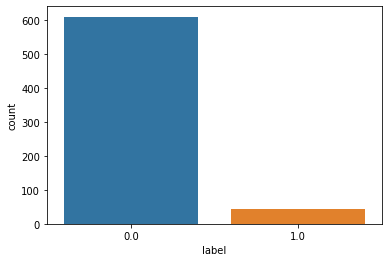

In [27]:
sns.countplot(new.label)

We had a **huge imbalance** in our Data

### heatmap

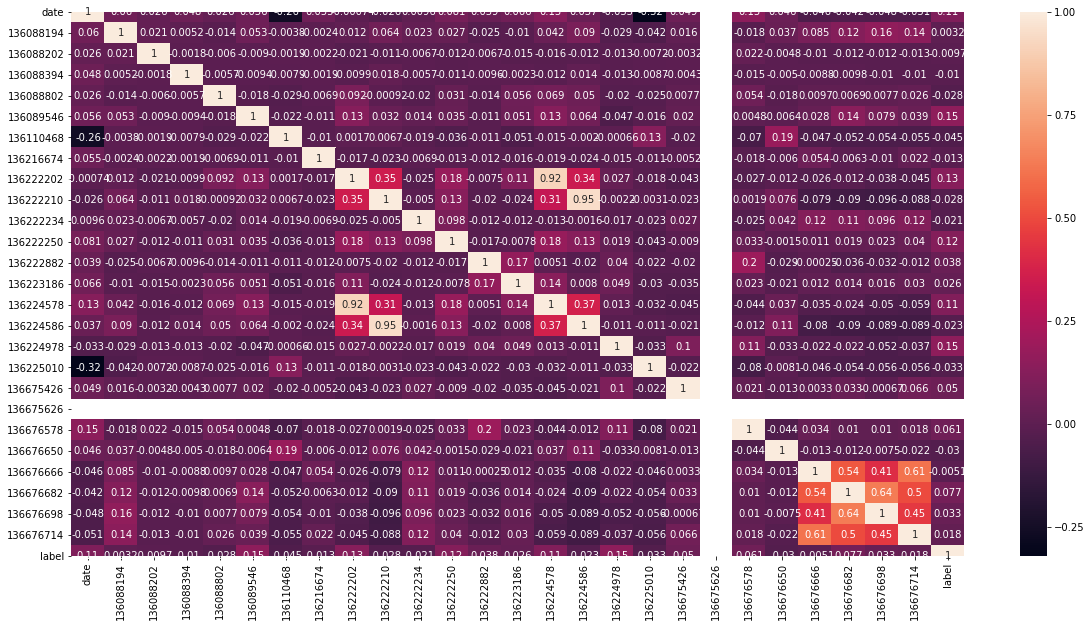

In [28]:
plt.figure(figsize=(20,10)) 
sns.heatmap(new.corr(), annot=True)

**so we got our dataset ready to model but with huge imbalance**

#### define variables

In [29]:
x = new.iloc[:,:-1]

In [30]:
y = new['label']

In [31]:
x.shape

(655, 26)

In [32]:
y.shape

(655,)

#### Split the data

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

we gave test set size = 30% and randome state = 33

lets see the test and train set sizes

In [34]:
X_train.shape

(458, 26)

In [35]:
X_test.shape

(197, 26)

In [36]:
y_train.shape

(458,)

In [37]:
y_test.shape

(197,)

so our dataset is devided into 458 train rows and 197 test rows.



### Build the model

In [38]:
#import all the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#### K-nearest nighbours

In [39]:
print("knn")
#K Nearest Neighbors
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)#fit the model
y_pred_knn=knn.predict(X_test)#predicting test set
print(metrics.accuracy_score(y_test,y_pred_knn))#gives accuracy

knn
0.9390862944162437


In [40]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_knn)
print(conf_matrix)

[[185   2]
 [ 10   0]]


In [41]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.0
precision
0.0


**Observation**:- Though this shows **Good Accuracy, Its not true. Accuracy always cheats us when we have **Data imbalance**. hence go for metrics like **Precision**,**recall**.

#### Decision trees

In [42]:
print("Decistion trees")
#Decision trees model
dt=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=12, min_samples_split=4, 
                          min_samples_leaf=3, min_weight_fraction_leaf=0.0, 
                          max_features=None, random_state=None, max_leaf_nodes=30)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_dt))

Decistion trees
0.9238578680203046


In [43]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_dt)
print(conf_matrix)

[[180   7]
 [  8   2]]


In [44]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.2
precision
0.2222222222222222


#### Logistic regression

In [45]:
print("Logistic Regression")
#Logistic Regression model
logreg=LogisticRegression(class_weight= {0:'0.2',1:'0.8'})
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg))

Logistic Regression
0.949238578680203


In [46]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_logreg)
print(conf_matrix)

[[187   0]
 [ 10   0]]


In [47]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.0
precision
nan


#### Random forest classifier

In [48]:
rfc=RandomForestClassifier(n_estimators=70,criterion='gini',class_weight = {0:'0.2',1:'0.8'})
#Random forest
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rfc))
print(rfc.feature_importances_)

0.949238578680203
[0.14435055 0.0364362  0.002399   0.         0.00283443 0.01055049
 0.10284723 0.00039648 0.0912078  0.05859609 0.00715959 0.03457128
 0.01967861 0.04056511 0.08208022 0.07367753 0.0731928  0.09234236
 0.01780192 0.         0.02647605 0.00199668 0.00641871 0.03322575
 0.02408697 0.01710815]


In [49]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_rfc)
print(conf_matrix)

[[187   0]
 [ 10   0]]


In [50]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.0
precision
nan


#### Support vector classifier

In [51]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_svc))

0.949238578680203


In [52]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_svc)
print(conf_matrix)

[[187   0]
 [ 10   0]]


In [53]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.0
precision
nan


#### XG boost

In [63]:
!pip install xgboost


     |████████████████████████████████| 142.8MB 664kB/s eta 0:00:011   |██████████████▍                 | 64.4MB 839kB/s eta 0:01:34     |██████████████████▋             | 83.0MB 388kB/s eta 0:02:34


In [64]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rfc))

0.949238578680203


In [65]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_xgb)
print(conf_matrix)

[[187   0]
 [  9   1]]


In [66]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.1
precision
1.0


**Note**:- 
- Even after using **all the suitable metrics**, we found that they poorly works, because we have **Imbalance** in our data.
- solution is to make our dataset balance using techniques like **upsampling**, **downsampling**, and using **SMOTE**.
   

# making imbalance to balance

### Oversampling

- from [here](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html) you can get or follow the syntax.
- Smote for **Noobs** [here](http://rikunert.com/SMOTE_explained)

In [68]:
!pip install imblearn

     |████████████████████████████████| 174kB 165kB/s eta 0:00:01


In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [70]:
from collections import Counter
X_res, y_res = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 611, 1.0: 611})


In [71]:
X_res.shape

(1222, 26)

In [72]:
y_res.shape

(1222,)

In [73]:
print(y_res)

[0. 1. 0. ... 1. 1. 1.]


Lets plot the **target variable**.

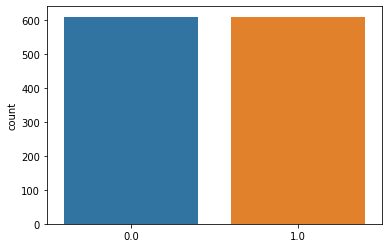

In [74]:
sns.countplot(y_res)

**Note**:- 
- So from here we understood that using **SMOTE** oversamples our data better than **random oversampling** and **random undersampling**.
- After doing SMOTE we got **Balanced dataset** for model building.

### Split the Data

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.3,random_state = 33)

In [76]:
X_train.shape

(855, 26)

In [77]:
y_train.shape

(855,)

In [78]:
X_test.shape

(367, 26)

In [79]:
y_test.shape

(367,)

### Build the model

In [80]:
#import all the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### KNN

In [81]:
print("knn")
#K Nearest Neighbors
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)#fit the model
y_pred_knn=knn.predict(X_test)#predicting test set
print(metrics.accuracy_score(y_test,y_pred_knn))#gives accuracy

knn
0.8392370572207084


In [82]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_knn)
print(conf_matrix)

[[142  52]
 [  7 166]]


In [83]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.9595375722543352
precision
0.7614678899082569


#### Precision recall curve

In [84]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision_knn = average_precision_score(y_test, y_pred_knn)

print('Average precision-recall score RF: {}'.format(average_precision_knn))


Average precision-recall score RF: 0.7497306199144891


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

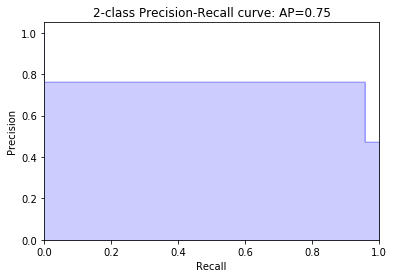

In [85]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_knn)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_knn))

### Decision trees

In [86]:
print("Decistion trees")
#Decision trees model
dt=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=12, min_samples_split=4, 
                          min_samples_leaf=3, min_weight_fraction_leaf=0.0, 
                          max_features=None, random_state=None, max_leaf_nodes=30)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_dt))

Decistion trees
0.7547683923705722


In [87]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_dt)
print(conf_matrix)

[[146  48]
 [ 42 131]]


In [88]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.7572254335260116
precision
0.7318435754189944


#### Precision recall curve

In [89]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision_dt = average_precision_score(y_test, y_pred_dt)

print('Average precision-recall score RF: {}'.format(average_precision_dt))


Average precision-recall score RF: 0.6686119855636073


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

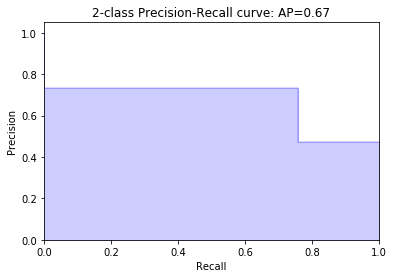

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_dt)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_dt))

### Logistic regression

In [91]:
print("Logistic Regression")
#Logistic Regression model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg))

Logistic Regression
0.6648501362397821


In [92]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_logreg)
print(conf_matrix)

[[105  89]
 [ 34 139]]


In [93]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.8034682080924855
precision
0.6096491228070176


#### Precision recall curve

In [94]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision_logreg = average_precision_score(y_test, y_pred_logreg)

print('Average precision-recall score RF: {}'.format(average_precision_logreg))


Average precision-recall score RF: 0.5824767400380272


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.58')

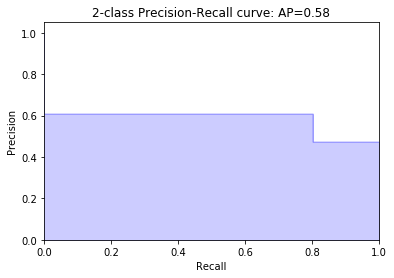

In [95]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_logreg)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_logreg))

### Random forest

In [96]:
rfc=RandomForestClassifier(n_estimators=70,criterion='gini',class_weight = {0:'0.2',1:'0.8'})
#Random forest
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rfc))
print(rfc.feature_importances_)

0.9400544959128065
[0.16008153 0.03096923 0.00665904 0.00024802 0.01592311 0.00817287
 0.1742209  0.         0.05610899 0.07777427 0.02873634 0.0062004
 0.03855999 0.03676571 0.05780388 0.0732466  0.02739464 0.07855918
 0.00926054 0.         0.03449636 0.00849886 0.01424366 0.02346703
 0.01620691 0.01640198]


In [97]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_rfc)
print(conf_matrix)

[[179  15]
 [  7 166]]


In [98]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.9595375722543352
precision
0.9171270718232044


#### Precsion recall curve

In [99]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision_rfc = average_precision_score(y_test, y_pred_rfc)

print('Average precision-recall score RF: {}'.format(average_precision_rfc))


Average precision-recall score RF: 0.8990914534282538


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.90')

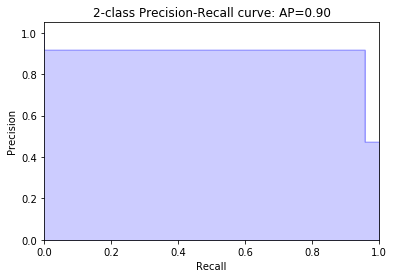

In [100]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_rfc)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_rfc))

### SVC

In [101]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_svc))

0.8828337874659401


In [102]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_svc)
print(conf_matrix)

[[193   1]
 [ 42 131]]


In [103]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.7572254335260116
precision
0.9924242424242424


#### Precison recall curve

In [104]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision_svc = average_precision_score(y_test, y_pred_svc)

print('Average precision-recall score RF: {}'.format(average_precision_svc))


Average precision-recall score RF: 0.8659302941051535


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.87')

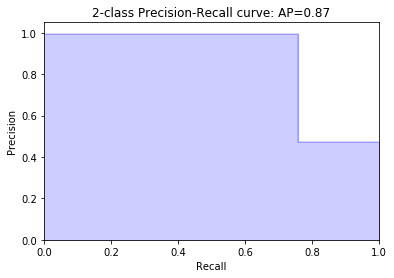

In [105]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_svc)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_svc))

### XGBoost

In [106]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_rfc))

0.9400544959128065


In [107]:
#lets get the true positive, false positive, true negative, false negative values
conf_matrix=metrics.confusion_matrix(y_test,y_pred_xgb)
print(conf_matrix)

[[152  42]
 [ 16 157]]


In [108]:
tp  = conf_matrix[1][1]
tn  = conf_matrix[0][0]
fp =conf_matrix[0,1]
fn =conf_matrix[1,0]
print("recall")
print(tp/float(fn+tp))
print("precision")
print(tp/float(tp+fp))

recall
0.9075144508670521
precision
0.7889447236180904


#### Precision Recall curve

In [109]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision_xgb = average_precision_score(y_test, y_pred_xgb)

print('Average precision-recall score RF: {}'.format(average_precision_xgb))


Average precision-recall score RF: 0.7595754678639611


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.76')

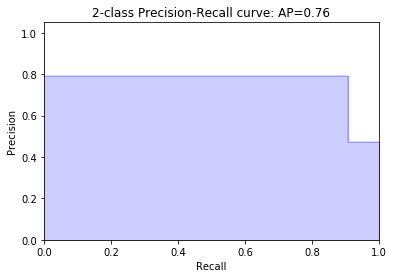

In [110]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_xgb))

#### Predicted vs actual 

In [111]:
output = pd.DataFrame({'actual':y_test, 'predicted':y_pred_rfc})

In [112]:
output

,actual,predicted
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


# Note:-
- So after using suitable models we got **Random forest** working better and has given **Good precision-recall score** to **90%**.
- so **Random forest wroks best**.

In [113]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
